# Export TESEO results

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/IHCantabria/pyteseo/blob/main/docs/notebooks/03_export_results.ipynb)

## Install pyTESEO
- If you are running this notebook from `Google colab` uncomment and run `!pip install pyteseo && pyteseo-tests` in the cell below. 
Doing this you will install `pyteseo` from `pypi` repository and run `pyteseo-tests` to check the installation (all tests have to succeed).

- If you are using this notebook in your own local machine you need to install the library from the local repo `pip install .` or pypi `pip install pyteseo`.

In [1]:
# !pip install pyteseo && pyteseo-tests

## Read TESEO's result files and export them to stadard formats (csv, json, geojson, nc).

In [2]:
import warnings

warnings.simplefilter(action="ignore")

1. Define paths

In [3]:
# path where example data needed by the use case is located
from pathlib import Path
import pyteseo.tests as tests_

results_path = Path(tests_.__file__).parent / "data"

output_dir = Path("test_notebook3").resolve()
output_dir.mkdir(exist_ok=True)
output_dir

PosixPath('/home/aragong/repositories/pyteseo/docs/notebooks/test_notebook3')

2. Read TESEO's result-files

In [4]:
from pyteseo.io.results import (
    read_particles_results,
    read_properties_results,
    read_grids_results,
)

df_particles = read_particles_results(results_path)
df_properties = read_properties_results(results_path)
df_grids = read_grids_results(results_path)

3. Export to other formats

In [5]:
from pyteseo.export.particles import export_particles
from pyteseo.export.properties import export_properties
from pyteseo.export.grids import export_grids

# Particles
export_particles(df_particles, "csv", output_dir)
export_particles(df_particles, "json", output_dir)

# Properties
export_properties(df_properties, "csv", output_dir)
export_properties(df_properties, "json", output_dir)

# Grids
export_grids(df_grids, "csv", output_dir)
export_grids(df_grids, "json", output_dir)
export_grids(df_grids, "nc", output_dir)

[spill_001] Particles successfully exported to CSV @ /home/aragong/repositories/pyteseo/docs/notebooks/test_notebook3/particles_001.csv

[spill_001] Particles successfully exported to JSON @ /home/aragong/repositories/pyteseo/docs/notebooks/test_notebook3/particles_001.json

[spill_001] Properties successfully exported to CSV @ /home/aragong/repositories/pyteseo/docs/notebooks/test_notebook3/properties_001.csv

[spill_002] Properties successfully exported to CSV @ /home/aragong/repositories/pyteseo/docs/notebooks/test_notebook3/properties_002.csv

[spill_001] Properties successfully exported to JSON @ /home/aragong/repositories/pyteseo/docs/notebooks/test_notebook3/properties_001.json

[spill_002] Properties successfully exported to JSON @ /home/aragong/repositories/pyteseo/docs/notebooks/test_notebook3/properties_002.json

[spill_001] Grids successfully exported to CSV @ /home/aragong/repositories/pyteseo/docs/notebooks/test_notebook3/grids_001.csv

[spill_002] Grids successfully expo

[PosixPath('/home/aragong/repositories/pyteseo/docs/notebooks/test_notebook3/grids_001.nc'),
 PosixPath('/home/aragong/repositories/pyteseo/docs/notebooks/test_notebook3/grids_002.nc')]

In [6]:
# Delete all generated files
import shutil

shutil.rmtree(output_dir)

[(-3.835, -3.77), (43.42, 43.46)]

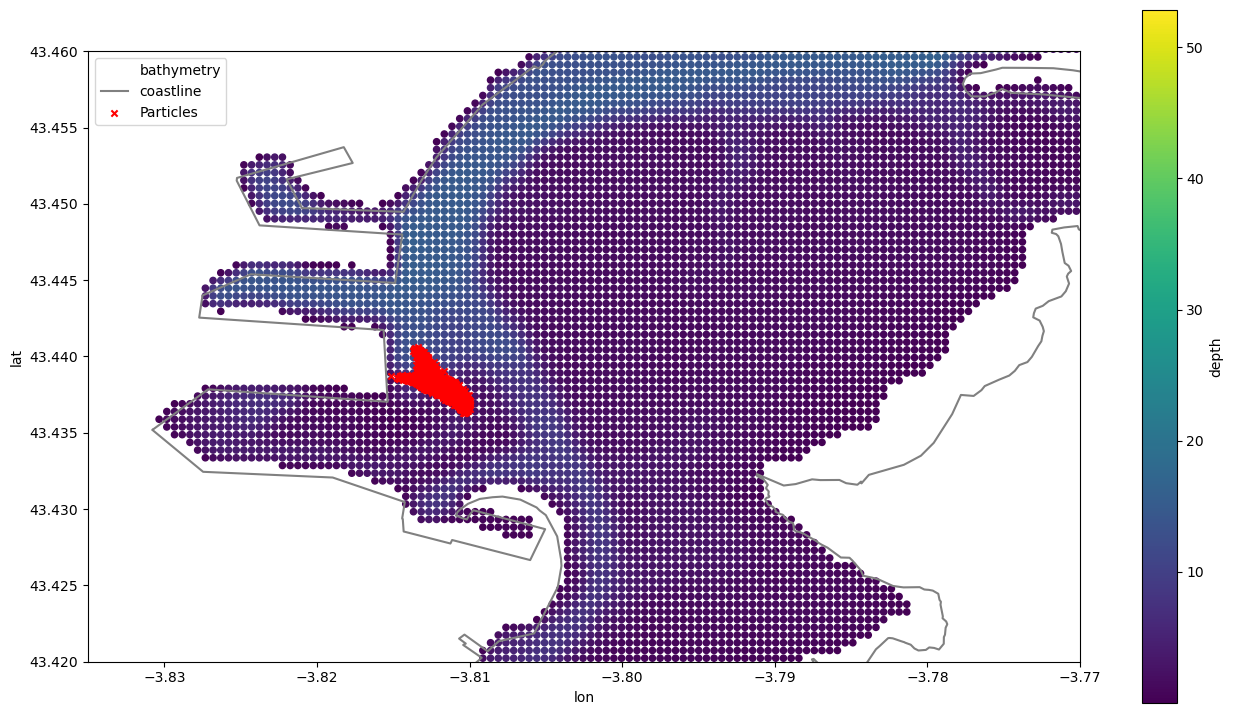

In [7]:
from pyteseo.io.domain import read_grid, read_coastline

df_grid = read_grid(results_path / "grid.dat", nan_value=-9999)
df_coastline = read_coastline(results_path / "coastline.dat")

ax = df_grid.plot.scatter(
    x="lon", y="lat", c="depth", figsize=(16, 9), label="bathymetry"
)
df_coastline.plot.line(ax=ax, x="lon", y="lat", color="grey", label="coastline")
df_particles.loc[df_particles["time"] == 1.5].plot.scatter(
    ax=ax, x="lon", y="lat", c="red", marker="x", label="Particles"
)

ax.axis("scaled")
ax.set(xlim=(-3.835, -3.77), ylim=(43.42, 43.46))